In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv('netflix-engagement-report.csv')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Unnamed: 6
0,ONE PIECE: Season 1,Yes,2023-08-31,"541,900,000",7:34,"71,600,000",NaN
1,Dear Child: Limited Series,Yes,2023-09-07,"252,800,000",4:49,"52,500,000",NaN
2,Who is Erin Carter?: Limited Series,Yes,2023-08-24,"286,200,000",5:43,"50,100,000",NaN
3,Lupin: Part 3,Yes,2023-10-05,"274,300,000",5:31,"49,700,000",NaN
4,The Witcher: Season 3,Yes,2023-06-29,"363,800,000",7:36,"47,900,000",NaN


In [ ]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (6599, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                6599 non-null   object 
 1   Available Globally?  6599 non-null   object 
 2   Release Date         3312 non-null   object 
 3   Hours Viewed         6599 non-null   object 
 4   Runtime              6599 non-null   object 
 5   Views                6599 non-null   object 
 6   Unnamed: 6           0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 361.0+ KB


In [ ]:
df.drop(columns=['Unnamed: 6'], inplace=True)


In [ ]:
# Remove commas and convert to integers
df['Hours Viewed'] = df['Hours Viewed'].str.replace(',', '').astype(int)
df['Views'] = df['Views'].str.replace(',', '').astype(int)


In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


In [ ]:
df['Runtime'].unique()

array(['7:34', '4:49', '5:43', ..., '11:40', '11:59', '1:29'],
      dtype=object)

In [ ]:
# Keep only rows where Runtime has ':' (meaning HH:MM format)
df = df[df['Runtime'].str.contains(':', na=False)]


In [ ]:
# Split hours and minutes
df[['Hours', 'Minutes']] = df['Runtime'].str.split(':', expand=True)

# Convert to integers
df['Runtime (mins)'] = df['Hours'].astype(int) * 60 + df['Minutes'].astype(int)

# Drop extra columns
df.drop(columns=['Runtime', 'Hours', 'Minutes'], inplace=True)


<ipython-input-12-66d3f4d94583>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_views, x='Views', y='Title', palette='viridis')


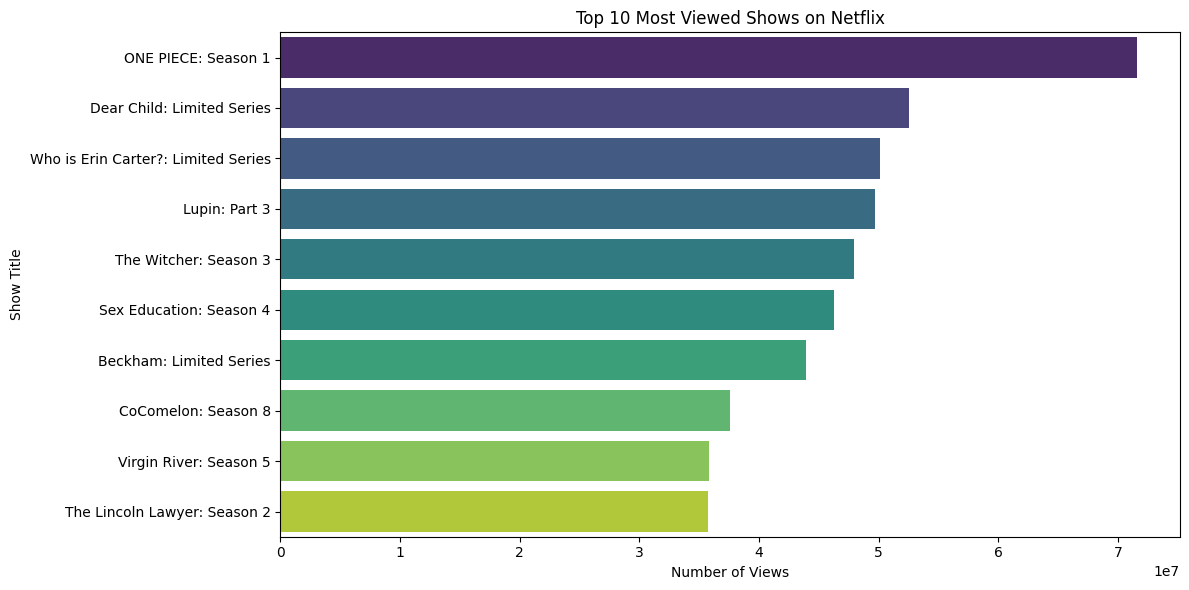

In [ ]:
top_views = df.sort_values(by='Views', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_views, x='Views', y='Title', palette='viridis')
plt.title('Top 10 Most Viewed Shows on Netflix')
plt.xlabel('Number of Views')
plt.ylabel('Show Title')
plt.tight_layout()
plt.show()
